<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
for col in ["Employment", "JobSat", "RemoteWork"]:
    print(col, "missing:", df[col].isna().sum())

# simple strategy: fill with the mode (most frequent)
for col in ["Employment", "JobSat", "RemoteWork"]:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode(dropna=True).iloc[0])

# verify
for col in ["Employment", "JobSat", "RemoteWork"]:
    print(col, "missing after fill:", df[col].isna().sum())

Employment missing: 0
JobSat missing: 36311
RemoteWork missing: 10631
Employment missing after fill: 0
JobSat missing after fill: 0
RemoteWork missing after fill: 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


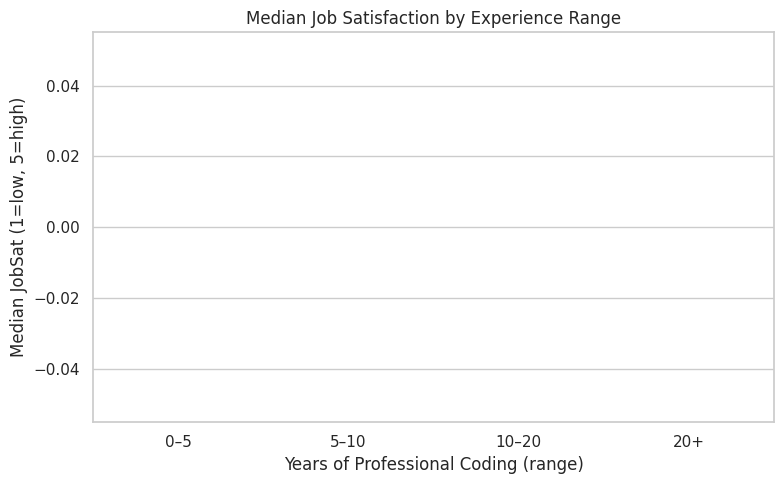

In [6]:


# YearsCodePro → numeric
def years_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s.startswith("less than"): return 0.5
    if s.startswith("more than"):
        m = re.search(r"\d+", s);  return float(m.group()) if m else np.nan
    try: return float(s)
    except: return np.nan

df["YearsCodePro_num"] = df["YearsCodePro"].apply(years_to_num)

# JobSat → ordinal (1–5)
sat_map = {
    "Very dissatisfied": 1,
    "Slightly dissatisfied": 2,
    "Neither satisfied nor dissatisfied": 3,
    "Slightly satisfied": 4,
    "Very satisfied": 5
}
df["JobSat_num"] = df["JobSat"].map(sat_map)

# Experience ranges
bins   = [0, 5, 10, 20, np.inf]
labels = ["0–5", "5–10", "10–20", "20+"]
df["ExperienceRange"] = pd.cut(df["YearsCodePro_num"], bins=bins, labels=labels, right=False)

# Median JobSat by range
med_sat = (df.dropna(subset=["ExperienceRange", "JobSat_num"])
             .groupby("ExperienceRange", observed=True)["JobSat_num"]
             .median()
             .reindex(labels)
             .reset_index())

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=med_sat, x="ExperienceRange", y="JobSat_num")
plt.title("Median Job Satisfaction by Experience Range")
plt.xlabel("Years of Professional Coding (range)")
plt.ylabel("Median JobSat (1=low, 5=high)")
plt.tight_layout(); plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


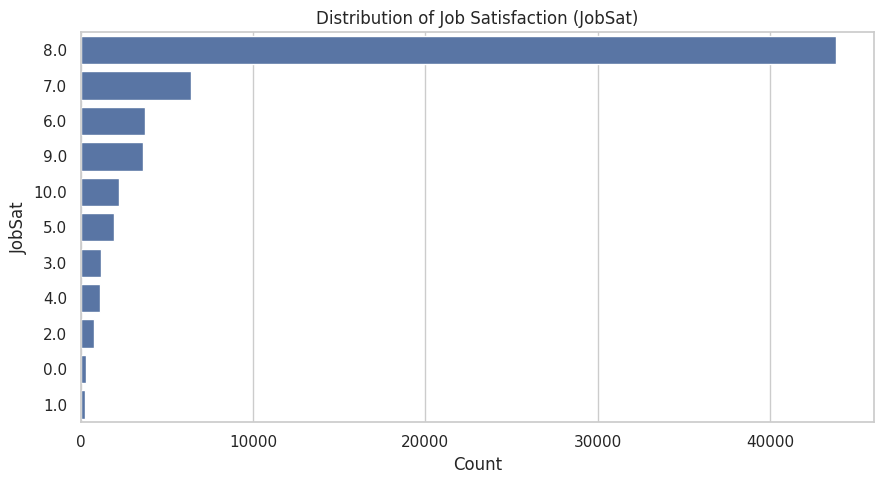

In [7]:
plt.figure(figsize=(9,5))
order = df["JobSat"].value_counts().index
sns.countplot(data=df, y="JobSat", order=order)
plt.title("Distribution of Job Satisfaction (JobSat)")
plt.xlabel("Count"); plt.ylabel("JobSat")
plt.tight_layout(); plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


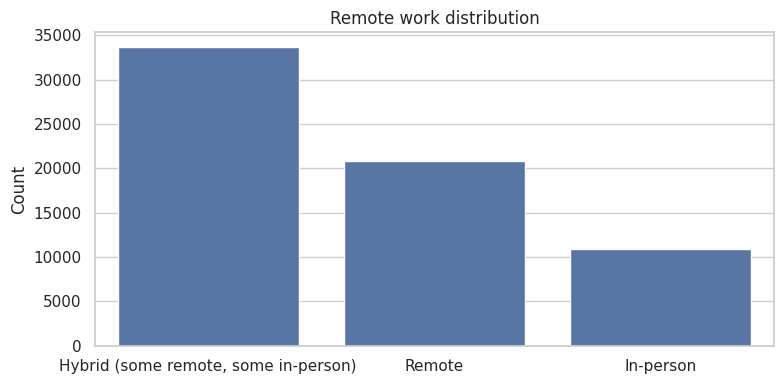

/tmp/ipykernel_2675/2421213365.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()## Write your code here


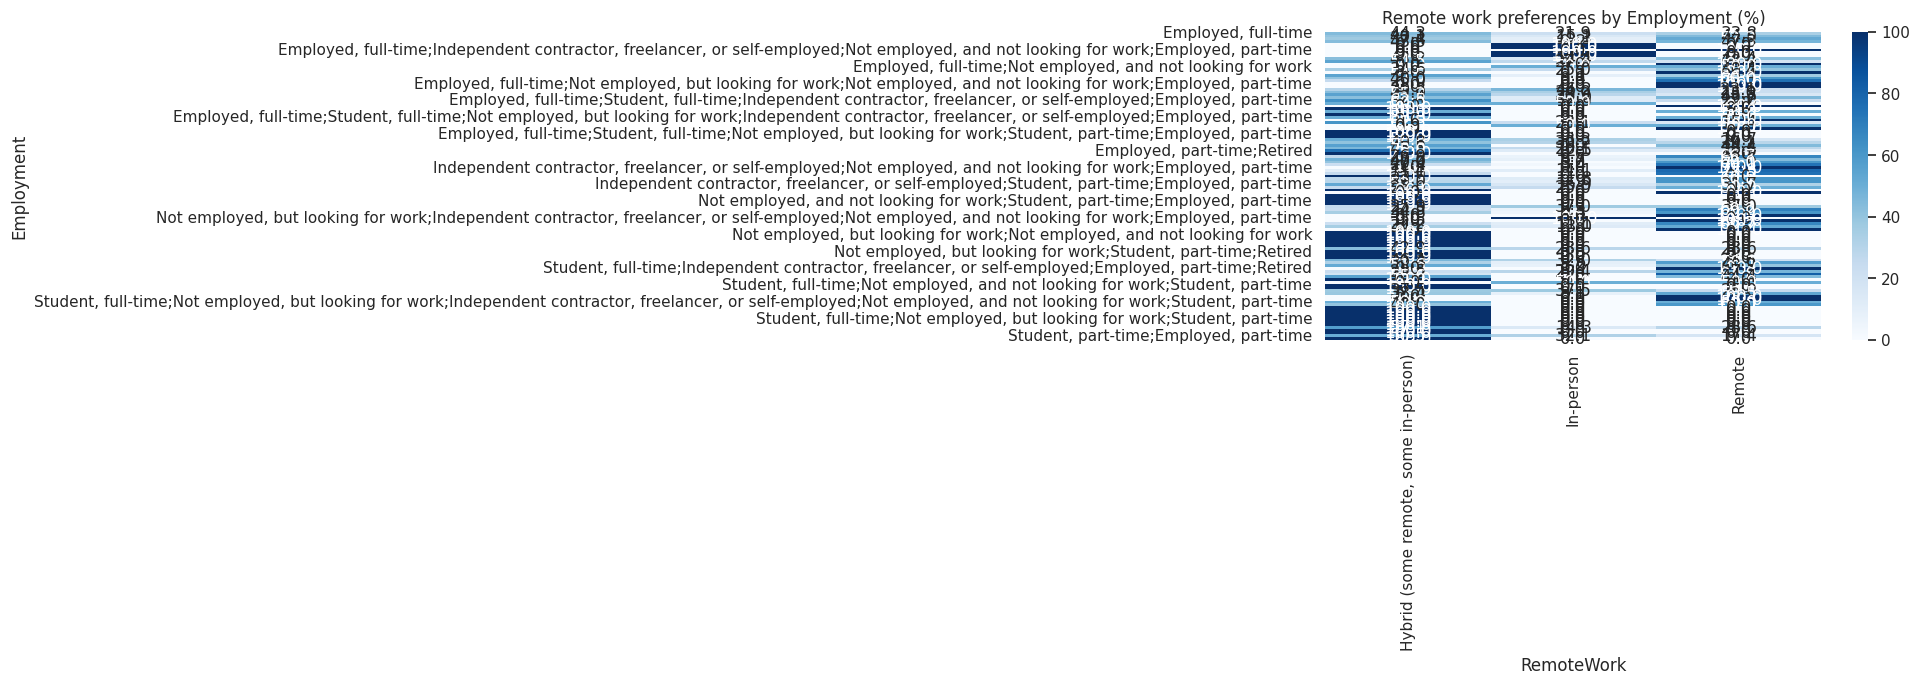

In [8]:
sns.set_theme(style="whitegrid")

# 6.a) Overall distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="RemoteWork", order=df["RemoteWork"].value_counts().index)
plt.title("Remote work distribution")
plt.xlabel(""); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# 6.b) Cross-tab by Employment (e.g., full-time/part-time) → heatmap of % per Employment
ct = pd.crosstab(df["Employment"], df["RemoteWork"], normalize="index")*100
plt.figure(figsize=(8,4))
sns.heatmap(ct.round(1), annot=True, fmt=".1f", cmap="Blues")
plt.title("Remote work preferences by Employment (%)")
plt.xlabel("RemoteWork"); plt.ylabel("Employment")
plt.tight_layout(); plt.show()## Write your code here

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


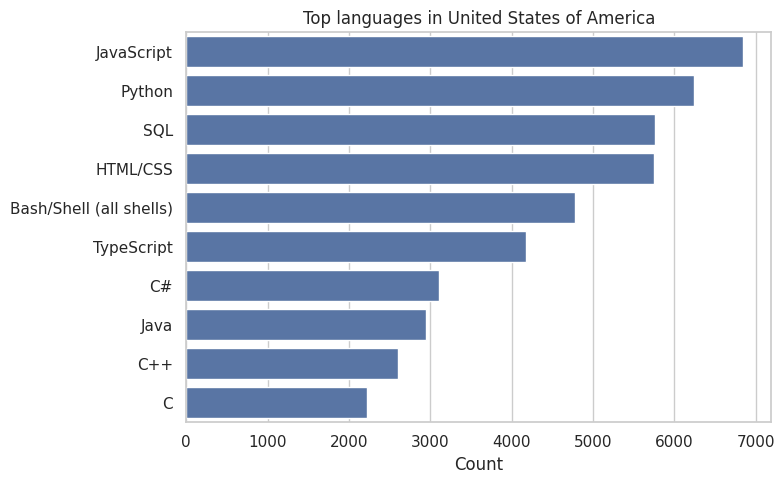

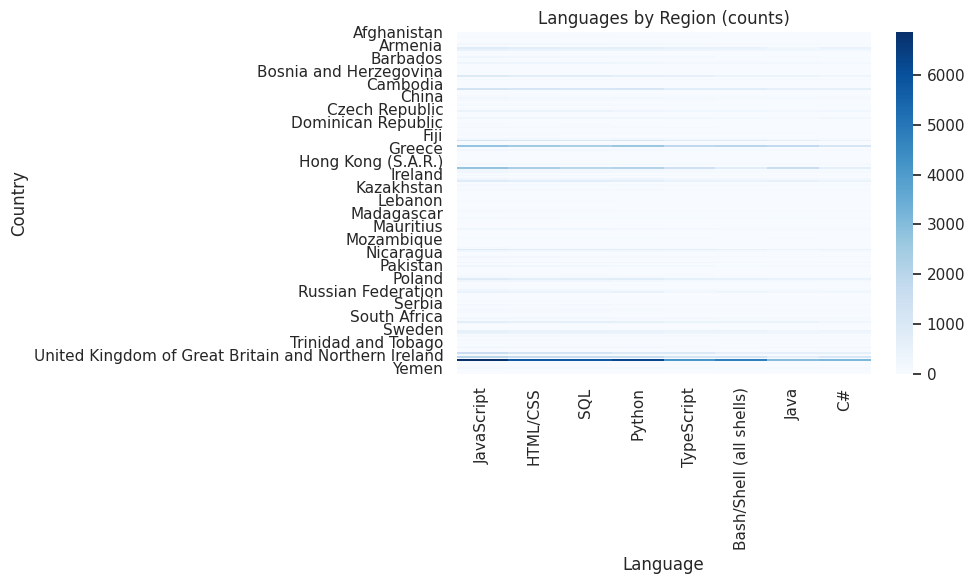

In [9]:
region_col = "Region" if "Region" in df.columns else "Country"

# Split multi-select column LanguageHaveWorkedWith and explode
langs = (
    df[[region_col, "LanguageHaveWorkedWith"]]
      .dropna()
      .assign(Language=lambda d: d["LanguageHaveWorkedWith"].str.split(r"[;|,]"))
      .explode("Language")
      .assign(Language=lambda d: d["Language"].str.strip())
      .query("Language != ''")
)

# Top languages by region (bar for one region – change 'United States' or pick any)
focus_region = "United States" if (langs[region_col] == "United States").any() else langs[region_col].mode().iloc[0]
top_langs_region = (langs[langs[region_col]==focus_region]["Language"]
                    .value_counts().head(10).reset_index())
top_langs_region.columns = ["Language","Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=top_langs_region, x="Count", y="Language")
plt.title(f"Top languages in {focus_region}")
plt.xlabel("Count"); plt.ylabel("")
plt.tight_layout(); plt.show()

# Heatmap: Top N languages across regions
N = 8
topN = langs["Language"].value_counts().head(N).index
pivot = pd.crosstab(langs[region_col], langs["Language"])
pivot = pivot[topN]

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Languages by Region (counts)")
plt.xlabel("Language"); plt.ylabel(region_col)
plt.tight_layout(); plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


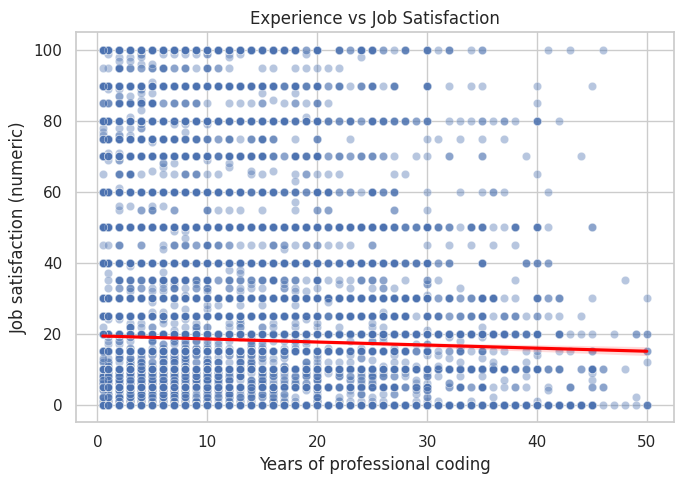

In [10]:
def years_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s.startswith("less than"): return 0.5
    if s.startswith("more than"):
        m = re.search(r"\d+", s);  return float(m.group()) if m else np.nan
    try: return float(s)
    except: return np.nan

df["YearsCodePro_num"] = df["YearsCodePro"].apply(years_to_num)

# If your dataset has JobSatPoints_1 (numeric), use it directly; otherwise map JobSat to 1–5
sat_col = "JobSatPoints_1" if "JobSatPoints_1" in df.columns else "JobSat_num"
if sat_col == "JobSat_num":
    sat_map = {
        "Very dissatisfied": 1,
        "Slightly dissatisfied": 2,
        "Neither satisfied nor dissatisfied": 3,
        "Slightly satisfied": 4,
        "Very satisfied": 5
    }
    df[sat_col] = df["JobSat"].map(sat_map)

# Scatter
plot_data = df.dropna(subset=["YearsCodePro_num", sat_col])
plt.figure(figsize=(7,5))
sns.scatterplot(data=plot_data, x="YearsCodePro_num", y=sat_col, alpha=0.4)
sns.regplot(data=plot_data, x="YearsCodePro_num", y=sat_col, scatter=False, color="red")
plt.title("Experience vs Job Satisfaction")
plt.xlabel("Years of professional coding"); plt.ylabel("Job satisfaction (numeric)")
plt.tight_layout(); plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_2675/1782596831.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


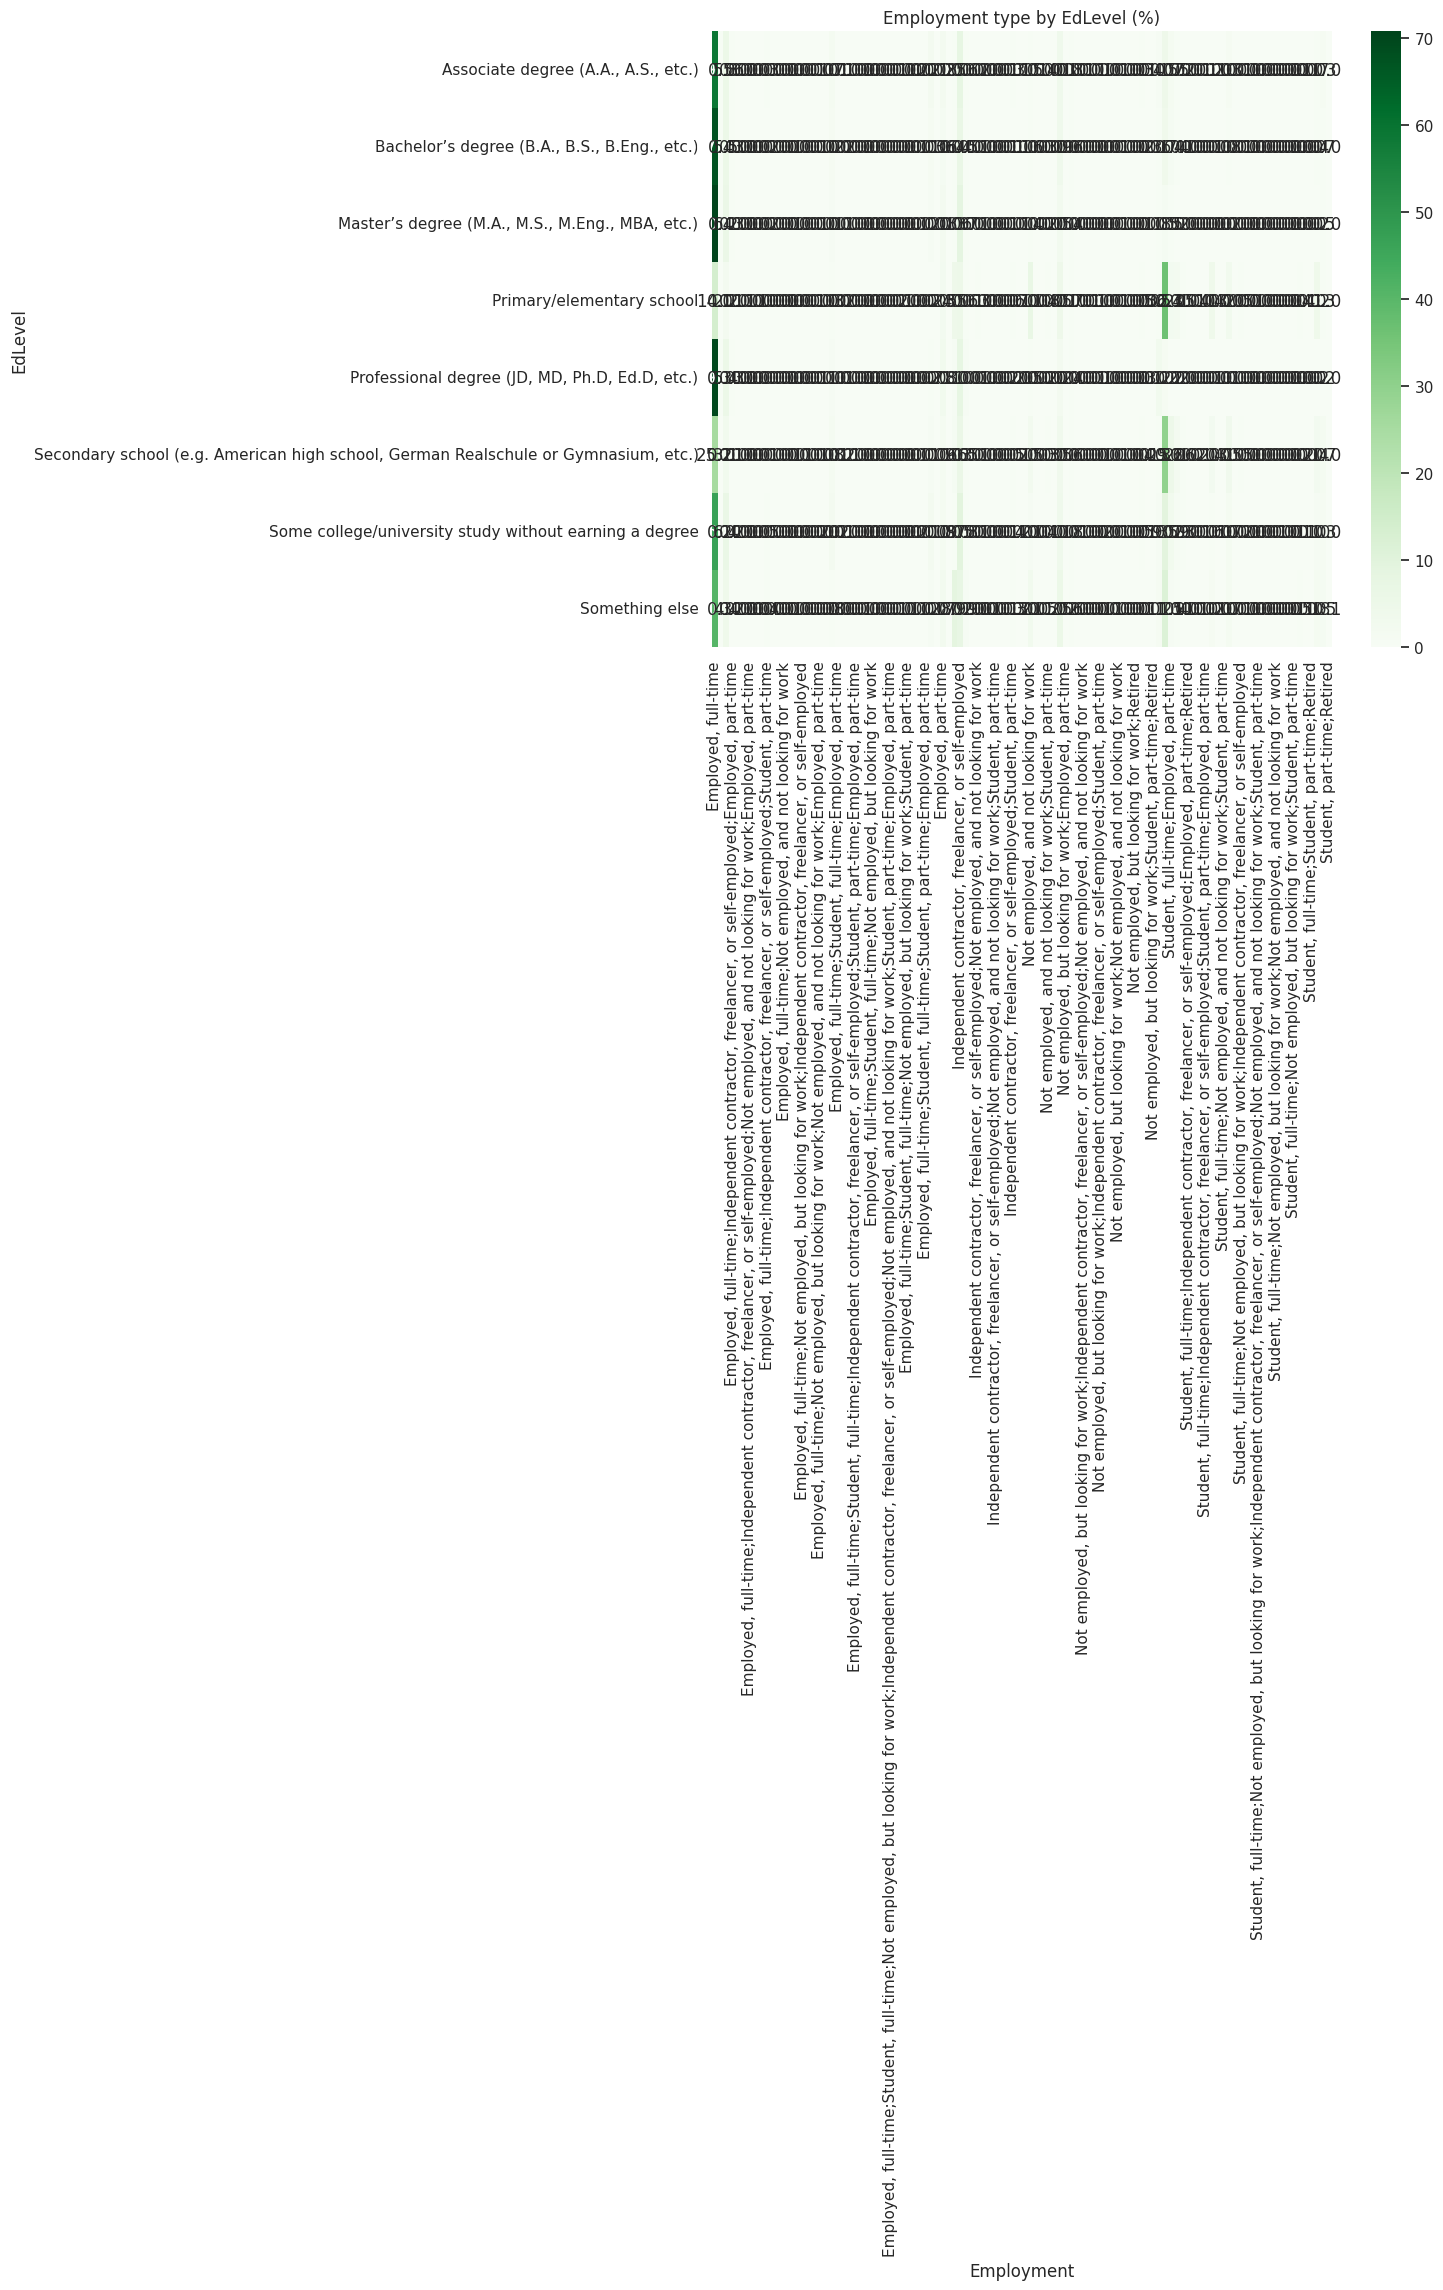

/tmp/ipykernel_2675/1782596831.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


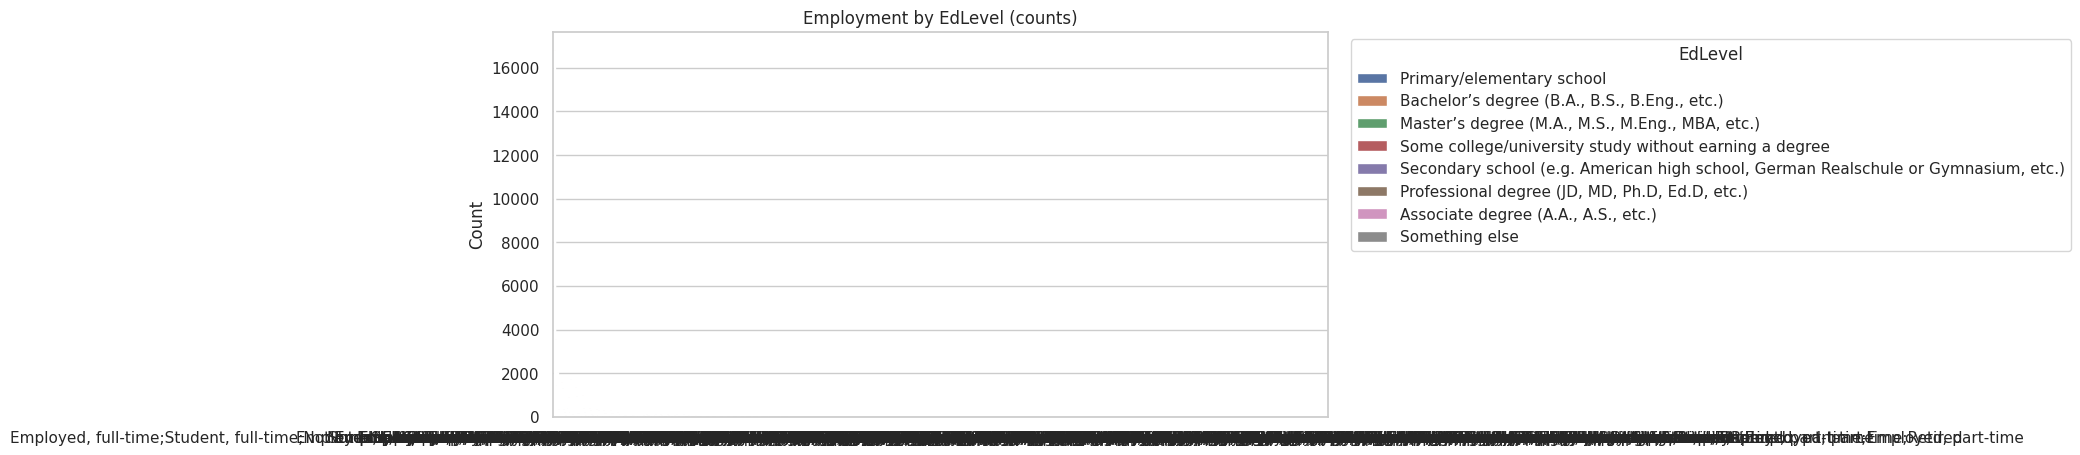

In [11]:
# Cross-tab (row %): how Employment breaks down by EdLevel
ct = pd.crosstab(df["EdLevel"], df["Employment"], normalize="index")*100
plt.figure(figsize=(10,8))
sns.heatmap(ct.round(1), cmap="Greens", annot=True, fmt=".1f")
plt.title("Employment type by EdLevel (%)")
plt.xlabel("Employment"); plt.ylabel("EdLevel")
plt.tight_layout(); plt.show()

# (Optional) bar chart for a quick view
plt.figure(figsize=(10,5))
order = df["Employment"].value_counts().index
sns.countplot(data=df, x="Employment", order=order, hue="EdLevel")
plt.title("Employment by EdLevel (counts)")
plt.xlabel(""); plt.ylabel("Count")
plt.legend(title="EdLevel", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [12]:
df.to_csv("cleaned_survey.csv", index=False)
print("Saved cleaned_survey.csv")

Saved cleaned_survey.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
